# Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Import Warnings to suppress unnecessary warnings

warnings.filterwarnings("ignore")

# Importing Data from CSV

In [66]:
df = pd.read_csv("dataset/Car Sales.xlsx - car_data.csv")

In [67]:
df.shape

(23906, 16)

In [68]:
df.head()

Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19000  60504-7114   
2          Overhead Camshaft       Manual         Red      31500  38701-8047   
3          Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  DoubleÂ Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style    Phone Dealer_Region  
0        SUV  8264678    Middletown  
1        SUV  6848189        Aurora  
2  Passenger  7298798    Greenville  
3        SUV  6257557         Pasco  
4  Hatchback  7081483    Janesville

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


# Data Cleaning

## Chuẩn Bị và Làm Sạch Dữ Liệu - Xử Lý Missing Values, Khám Phá và Xử Lý Outliers

### Kiểm tra Missing values
### Kiểm tra Duplicates
### Kiểm tra data type
### Kiểm tra số lượng unique values của từng column
### Kiểm tra statistics của data set
### Kiểm tra các categories khác nhau có trong các categorical column

In [70]:
# Checking for missing values
df.isnull().sum()

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64

### There are no missing values in the dataset

In [71]:
# Checking for unique values
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [72]:
# Checking for duplicates
df.duplicated().sum()

0

### There is no duplicate data in the dataset.

In [73]:
# Checking Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


### There are 3 int64 and 13 object type features present

In [74]:
df.nunique()

Car_id           23906
Date               612
Customer Name     3021
Gender               2
Annual Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price ($)          870
Dealer_No            7
Body Style           5
Phone            23804
Dealer_Region        7
dtype: int64

### Nếu chúng ta thấy rằng có một số người đã mua nhiều Cars vì họ có cùng số điện thoại: Vì Unique Car_id != Unique Phone

In [75]:
# Checking the staistics of the data again :
df.describe()

Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06

- The Maximum Price of car is = 858000

- The Minimum Price of car is = 1200

- Types of Engines = 2, Color = 3 and Body Styles = 5

# Data Preprocessing

In [76]:
# Numerical columns
numerical_cols=df.select_dtypes(exclude=['object']).columns

In [77]:
df[numerical_cols].head(2)

Annual Income  Price ($)    Phone
0          13500      26000  8264678
1        1480000      19000  6848189

Text(0, 0.5, 'Giá (USD)')

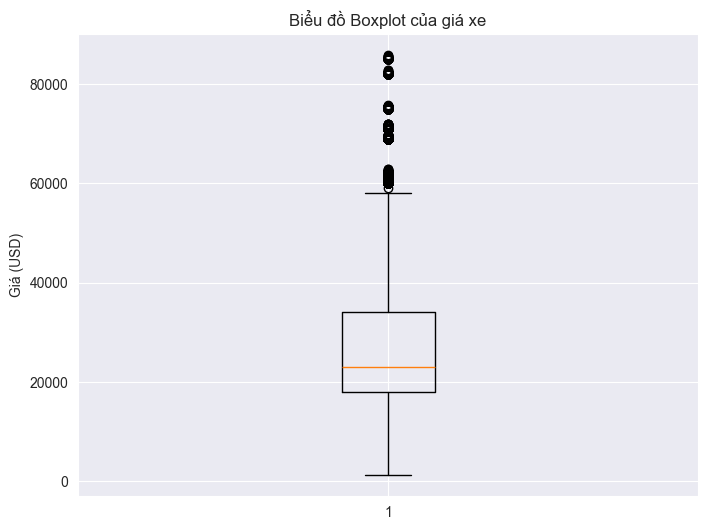

In [78]:
# checking outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price ($)'])

# Thêm tiêu đề và nhãn cho các trục
plt.title('Biểu đồ Boxplot của giá xe')
plt.ylabel('Giá (USD)')

In [79]:
Q1 = df['Price ($)'].quantile(0.25)
Q3 = df['Price ($)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price ($)'] >= lower_bound) & (df['Price ($)'] <= upper_bound)]

In [80]:
# Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [81]:
# Checking the categories of the categorical features:
print("The categories in the variable 'Gender': ",end=" ")
print(df['Gender'].unique())

print("The categories in the variable 'Company': ",end=" ")
print(df['Company'].unique())

print("The categories in the variable 'Engine': ",end=" ")
print(df['Engine'].unique())

print("The categories in the variable 'Transmission': ",end=" ")
print(df['Transmission'].unique())

print("The categories in the variable 'Color': ",end=" ")
print(df['Color'].unique())

print("The categories in the variable 'Body Style': ",end=" ")
print(df['Body Style'].unique())

print("The categories in the variable 'Dealer_Region': ",end=" ")
print(df['Dealer_Region'].unique())

The categories in the variable 'Gender':  ['Male' 'Female']
The categories in the variable 'Company':  ['Ford' 'Dodge' 'Cadillac' 'Toyota' 'Acura' 'Mitsubishi' 'Nissan'
 'Mercury' 'BMW' 'Chrysler' 'Subaru' 'Hyundai' 'Honda' 'Infiniti' 'Audi'
 'Porsche' 'Volkswagen' 'Buick' 'Saturn' 'Mercedes-B' 'Jaguar' 'Volvo'
 'Chevrolet' 'Pontiac' 'Lincoln' 'Oldsmobile' 'Lexus' 'Plymouth' 'Saab'
 'Jeep']
The categories in the variable 'Engine':  ['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']
The categories in the variable 'Transmission':  ['Auto' 'Manual']
The categories in the variable 'Color':  ['Black' 'Red' 'Pale White']
The categories in the variable 'Body Style':  ['SUV' 'Passenger' 'Hatchback' 'Hardtop' 'Sedan']
The categories in the variable 'Dealer_Region':  ['Middletown' 'Aurora' 'Greenville' 'Pasco' 'Janesville' 'Scottsdale'
 'Austin']


In [82]:
df[categorical_cols].head(2)

Car_id      Date Customer Name Gender  \
0  C_CND_000001  1/2/2022     Geraldine   Male   
1  C_CND_000002  1/2/2022           Gia   Male   

                           Dealer_Name Company       Model  \
0  Buddy Storbeck's Diesel Service Inc    Ford  Expedition   
1                     C & M Motors Inc   Dodge     Durango   

                      Engine Transmission  Color  Dealer_No  Body Style  \
0  DoubleÂ Overhead Camshaft         Auto  Black  06457-3834        SUV   
1  DoubleÂ Overhead Camshaft         Auto  Black  60504-7114        SUV   

  Dealer_Region  
0    Middletown  
1        Aurora

In [83]:
# This specific type of Engine name is 'DoubleÂ\xa0Overhead Camshaft' -> 'Double Overhead Camshaft'
print(df['Engine'].value_counts()['DoubleÂ\xa0Overhead Camshaft'])

# Replace occurrences
df['Engine'] = df['Engine'].replace('DoubleÂ\xa0Overhead Camshaft', 'Double Overhead Camshaft')

# Confirming the replacement
print(df['Engine'].unique())

11848
['Double Overhead Camshaft' 'Overhead Camshaft']


In [84]:
# Now, defining Numerical and Categorical Features :
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Names of Numeric and Categorical Features :
print('We have {} numerical features : {}'.format(len(num_feature), num_feature))
print('We have {} categorical features : {}'.format(len(cat_feature), cat_feature))

We have 3 numerical features : ['Annual Income', 'Price ($)', 'Phone']
We have 13 categorical features : ['Car_id', 'Date', 'Customer Name', 'Gender', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Dealer_No ', 'Body Style', 'Dealer_Region']


In [85]:
df['Price_to_Income_Ratio'] = df['Price ($)'] / df['Annual Income']


In [86]:
df['Full_Car_Name'] = df['Company'].astype(str) + ' ' + df['Model'].astype(str)


In [87]:
df['Customer_Purchases'] = df['Customer Name'].map(df['Customer Name'].value_counts())


In [88]:
def map_region(region):
    if region in ['North Region']: return 'North'
    elif region in ['Central Region']: return 'Central'
    elif region in ['South Region']: return 'South'
    else: return 'Unknown'
df['Region_Mapped'] = df['Dealer_Region'].apply(map_region)


In [89]:
drop_col = ['Phone','Car_id']
df = df.drop(drop_col,axis=1)

- Như chúng ta có thể thấy, có một số features không quá hữu ích mà chúng ta có thể loại bỏ:

- Phone
- Car_id


In [90]:
df.head()

Date Customer Name Gender  Annual Income  \
0  1/2/2022     Geraldine   Male          13500   
1  1/2/2022           Gia   Male        1480000   
2  1/2/2022        Gianna   Male        1035000   
3  1/2/2022       Giselle   Male          13500   
4  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                     Engine Transmission       Color  Price ($)  Dealer_No   \
0  Double Overhead Camshaft         Auto       Black      26000  06457-3834   
1  Double Overhead Camshaft         Auto       Black      19000  60504-7114   
2         Overhead Camshaft       Manual         Red      31500  38701-8047   
3         Overhead Camshaft       Manual  Pale White      14000  99301-3882   
4  Double Overhead Camshaft         Auto         Red      24500  53546-9427   

  Body Style Dealer_Region  Price_to_Income_Ratio      Full_Car_Name  \
0        SUV    Middletown               1.925926    Ford Expedition   
1        SUV        Aurora               0.012838      Dodge Durango   
2  Passenger    Greenville               0.030435  Cadillac Eldorado   
3        SUV         Pasco               1.037037      Toyota Celica   
4  Hatchback    Janesville               0.016724           Acura TL   

   Customer_Purchases Region_Mapped  
0                 5.0       Unknown  
1                17.0       Unknown  
2                24.0       Unknown  
3                12.0       Unknown  
4                35.0       Unknown

# Exploratory Data Analysis

- Graphs
- Plots
- Realtional Graphs
- Univariate and Bivariate Analysis


## Mục Tiêu - Phân tích doanh số bán Cars
## Trường Hợp Sử Dụng - Phân Tích Dữ Liệu để có insight về doanh số

<Axes: xlabel='Gender', ylabel='count'>

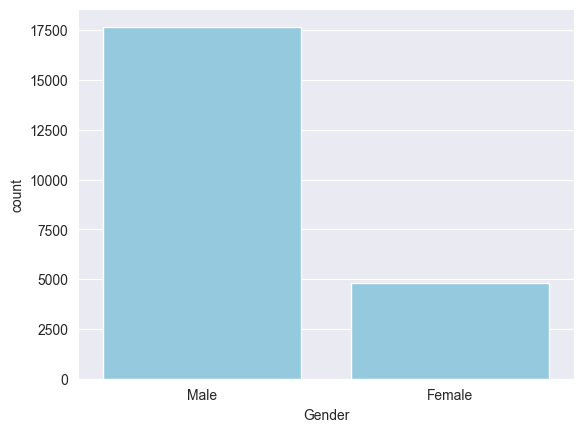

In [91]:
sns.countplot(data=df,x='Gender',color='skyblue')

<Axes: xlabel='count', ylabel='Company'>

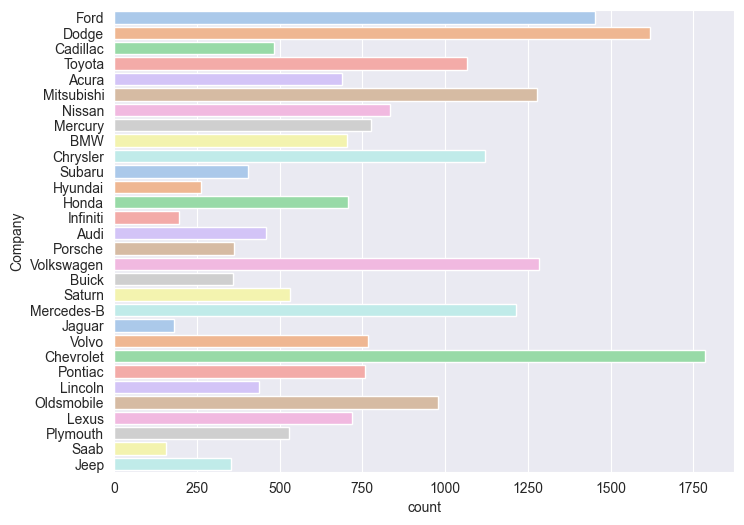

In [92]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df,y='Company',palette = 'pastel')

<Axes: xlabel='count', ylabel='Model'>

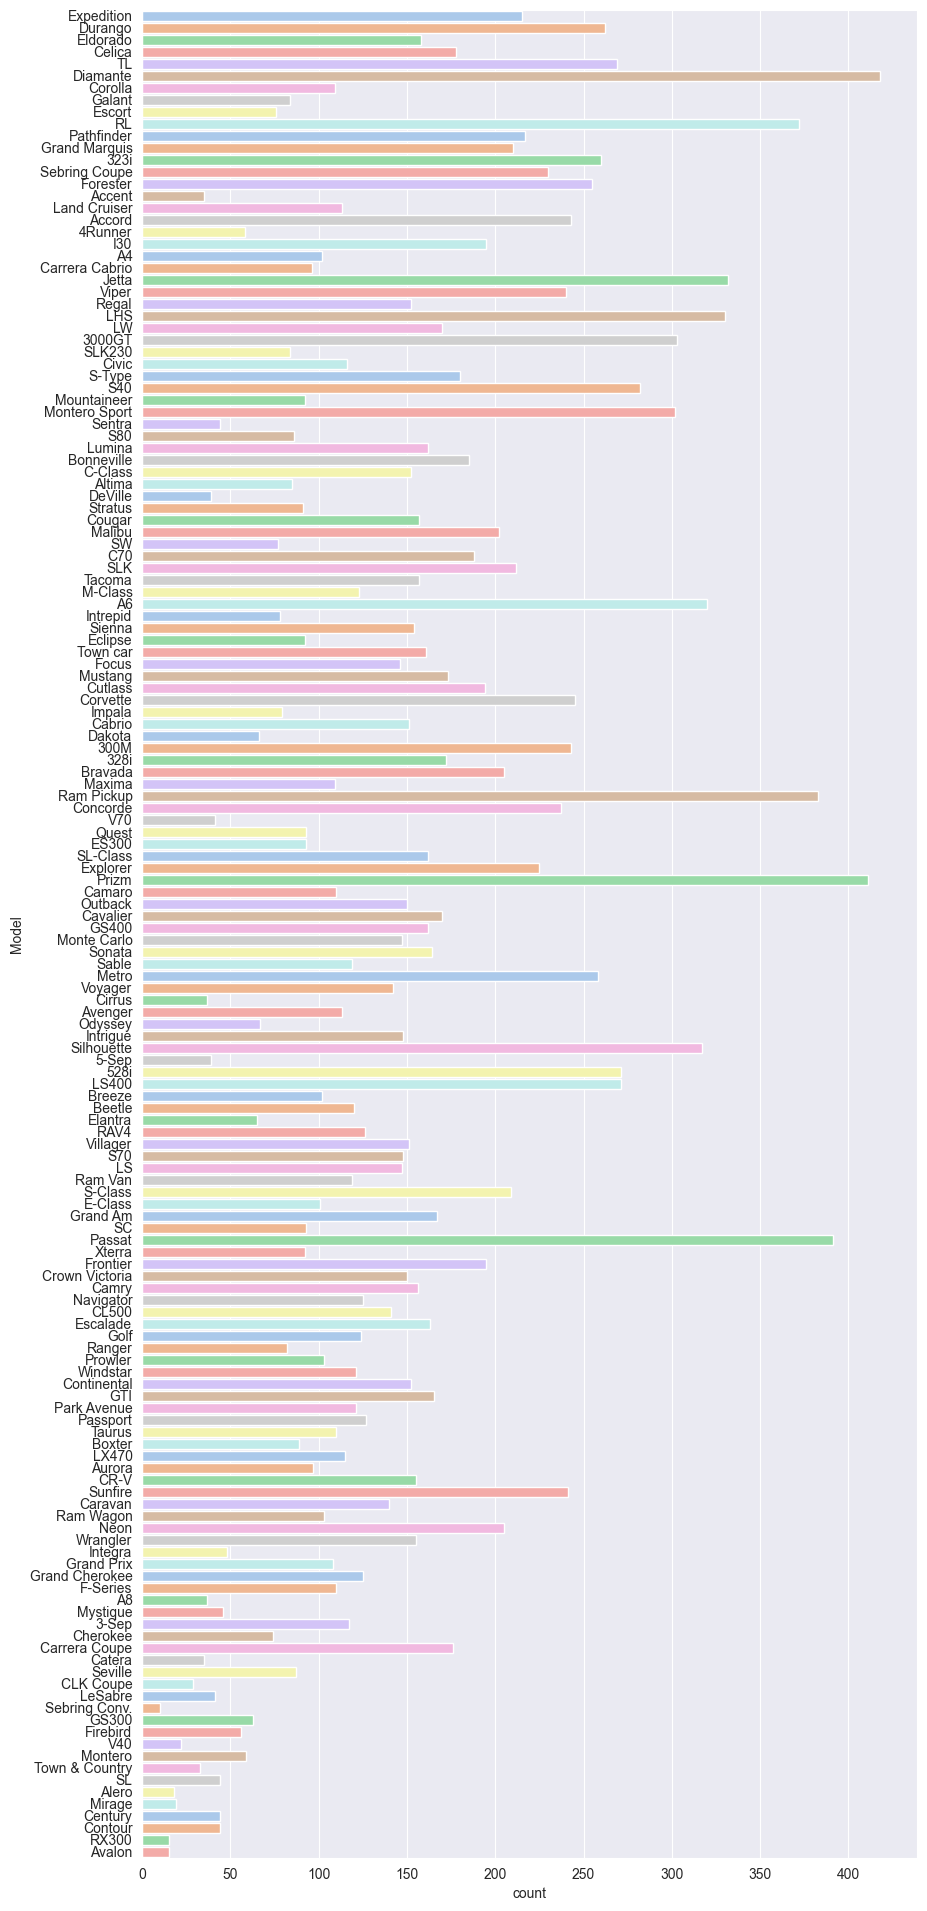

In [93]:
plt.figure(figsize=(10, 24))
sns.countplot(data=df,y='Model',palette = 'pastel')

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Mapear género a colores
color_map = {'DoubleÂ\xa0Overhead Camshaft': 'blue', 'Overhead Camshaft': 'red'}
df['Color'] = df['Gender'].map(color_map)

# Crear el gráfico de dispersión 3D con Plotly
fig = px.scatter_3d(df, x='Annual Income', y='Price ($)', z='Company', color='Engine', opacity=0.6,
                     color_discrete_map={'DoubleÂ\xa0Overhead Camshaft': 'blue', 'Overhead Camshaft': 'red'},
                     labels={'Annual Income': 'Ingreso Anual', 'Price ($)': 'Precio', 'Car_id': 'Car_id'},
                     title='Gráfico de Dispersión 3D con Engine como Color')

fig.show()

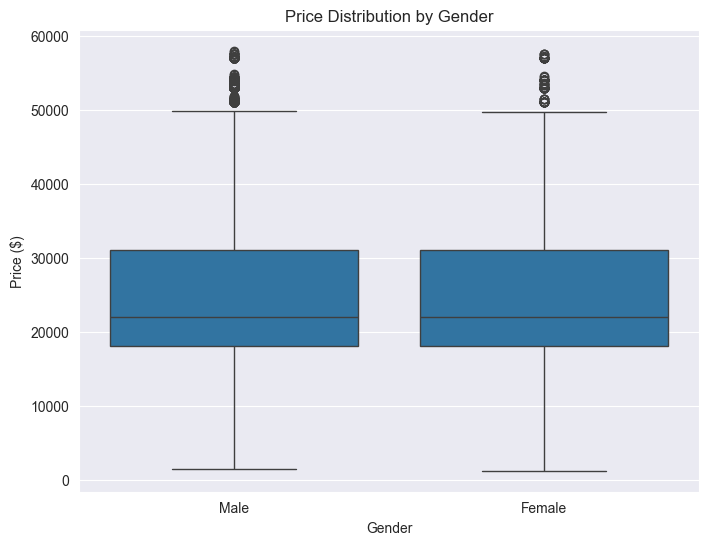

In [95]:
# 1. Price Distribution by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Price ($)', data=df)
plt.title('Price Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Price ($)')
plt.show()

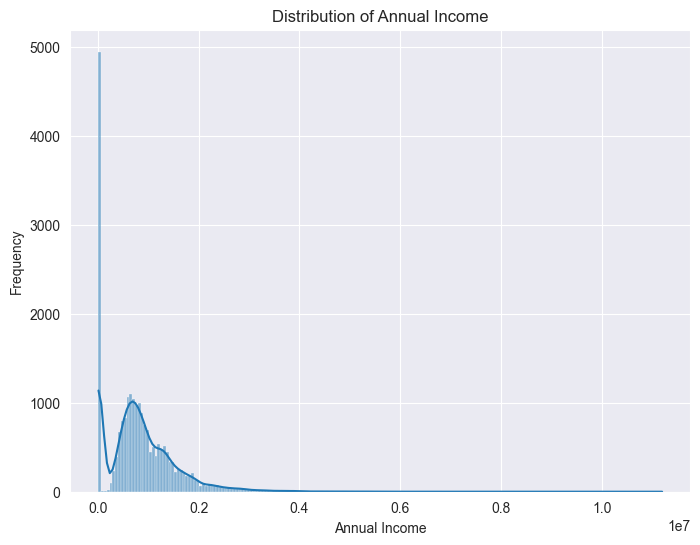

In [96]:
# 2. Annual Income Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

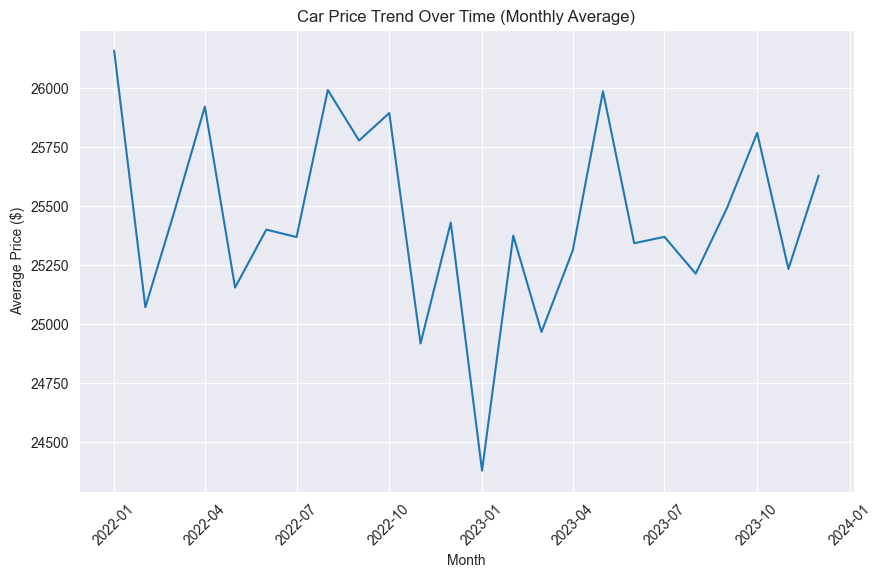

In [97]:
# Grouping data by month and calculating the average price for each month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
monthly_price = df.groupby('Month')['Price ($)'].mean().reset_index()
monthly_price['Month'] = monthly_price['Month'].dt.to_timestamp()

# Code for the modified line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price ($)', data=monthly_price)
plt.title('Car Price Trend Over Time (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

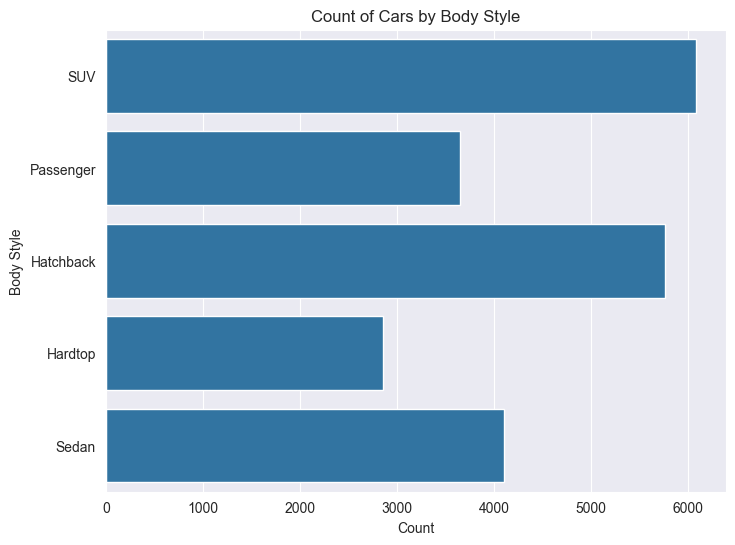

In [98]:
# 4. Count of Cars by Body Style
plt.figure(figsize=(8, 6))
sns.countplot(y='Body Style', data=df)
plt.title('Count of Cars by Body Style')
plt.xlabel('Count')
plt.ylabel('Body Style')
plt.show()

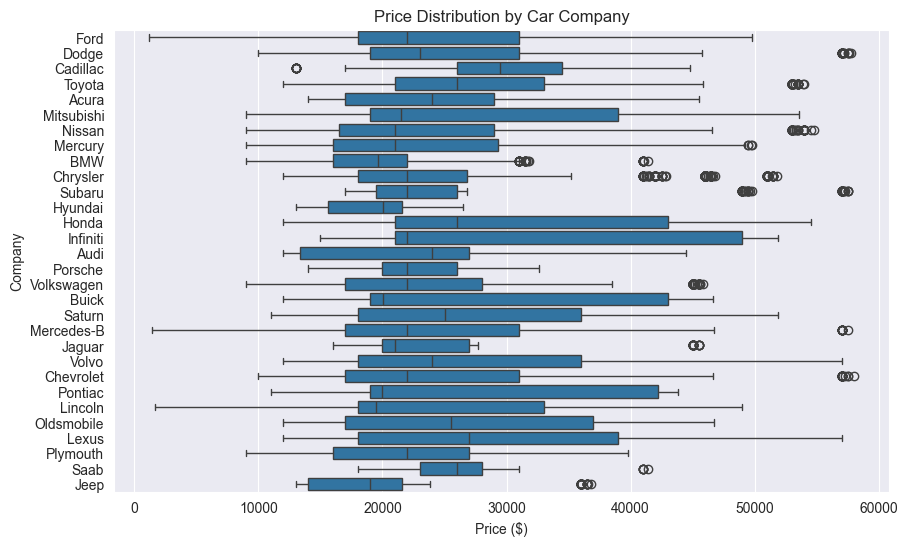

In [99]:
# 5. Price Distribution by Car Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', y='Company', data=df)
plt.title('Price Distribution by Car Company')
plt.xlabel('Price ($)')
plt.ylabel('Company')
plt.show()

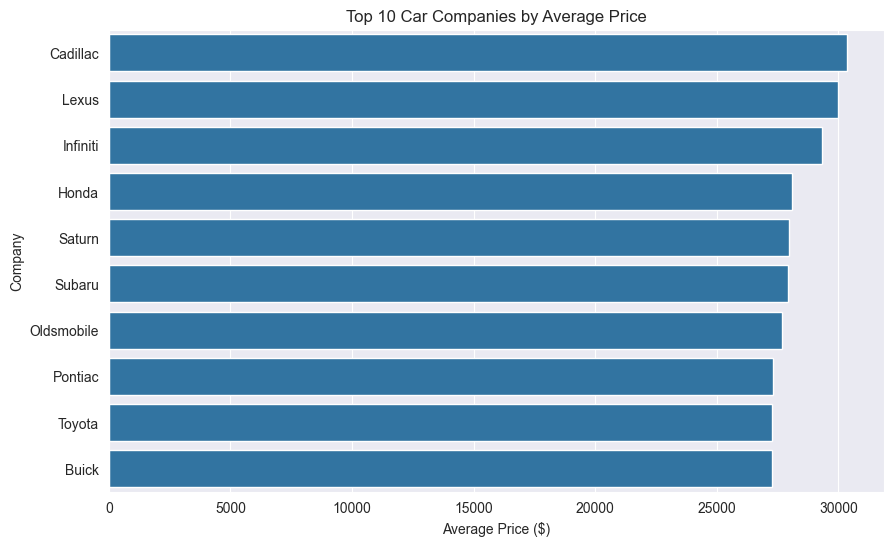

In [100]:
# Top 10 Car Companies by Average Price
top_10_companies = df.groupby('Company')['Price ($)'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_companies.values, y=top_10_companies.index)
plt.title('Top 10 Car Companies by Average Price')
plt.xlabel('Average Price ($)')
plt.ylabel('Company')
plt.show()


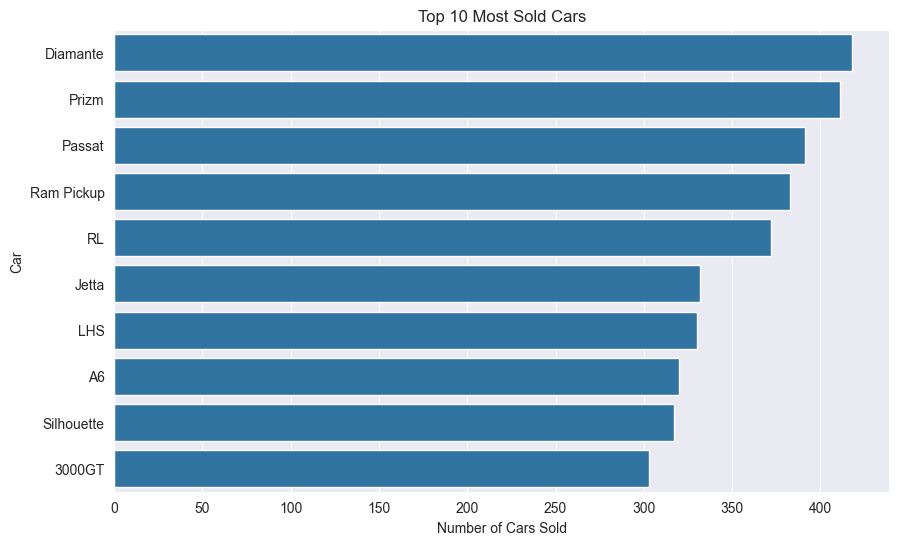

In [101]:
# top xe bán chạy nhất
top_10_cars = df['Model'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_cars.values, y=top_10_cars.index)
plt.title('Top 10 Most Sold Cars')
plt.xlabel('Number of Cars Sold')
plt.ylabel('Car')
plt.show()


<Axes: xlabel='Engine', ylabel='count'>

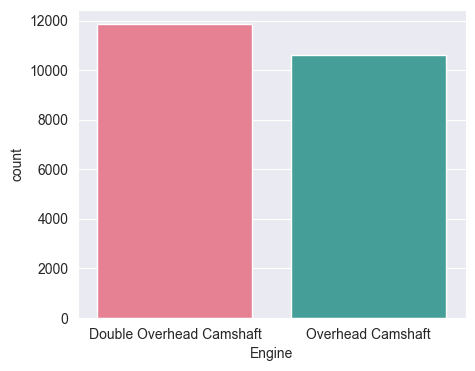

In [102]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df,x='Engine',palette='husl')

<Axes: xlabel='Transmission', ylabel='count'>

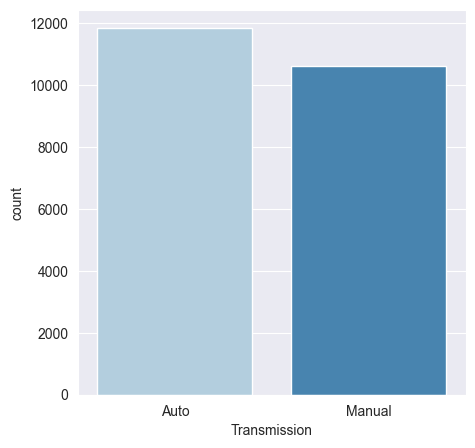

In [103]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df,x='Transmission',palette = 'Blues')

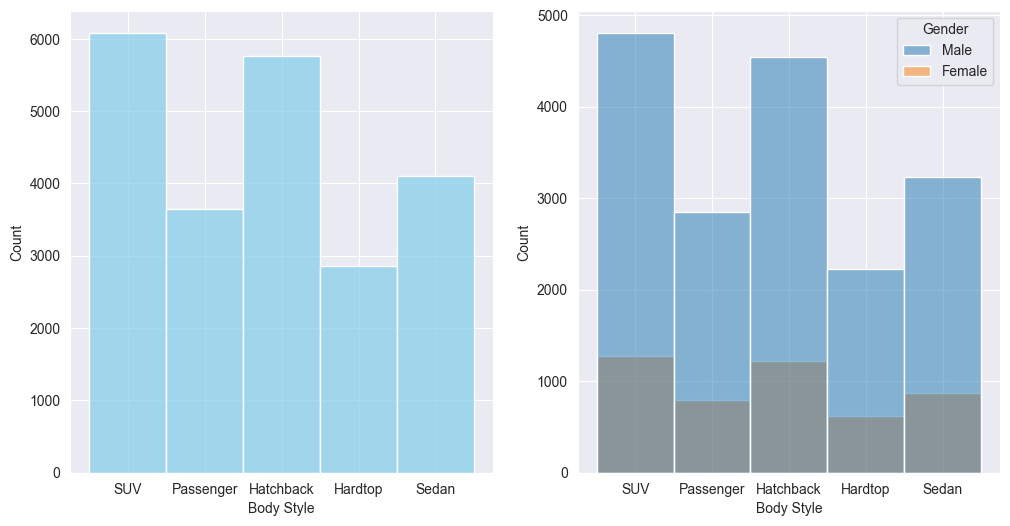

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=df,x='Body Style',color='skyblue')
plt.subplot(122)
sns.histplot(data=df,x='Body Style',hue='Gender')
plt.show()

<Axes: xlabel='Dealer_Region', ylabel='count'>

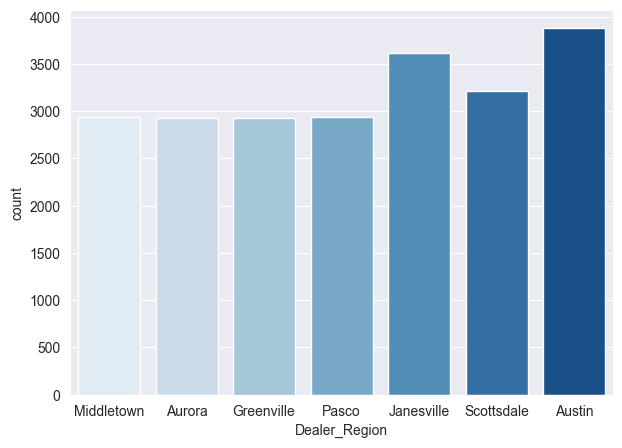

In [105]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df,x='Dealer_Region',palette = 'Blues')

<Axes: xlabel='Price ($)', ylabel='Transmission'>

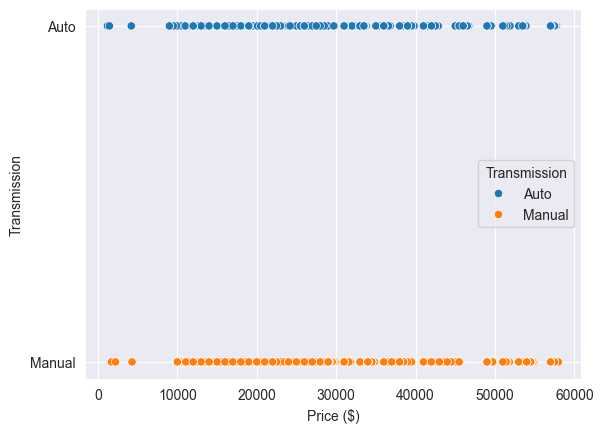

In [106]:
sns.scatterplot(data=df,x='Price ($)',y='Transmission',hue='Transmission')

<Figure size 500x500 with 0 Axes>

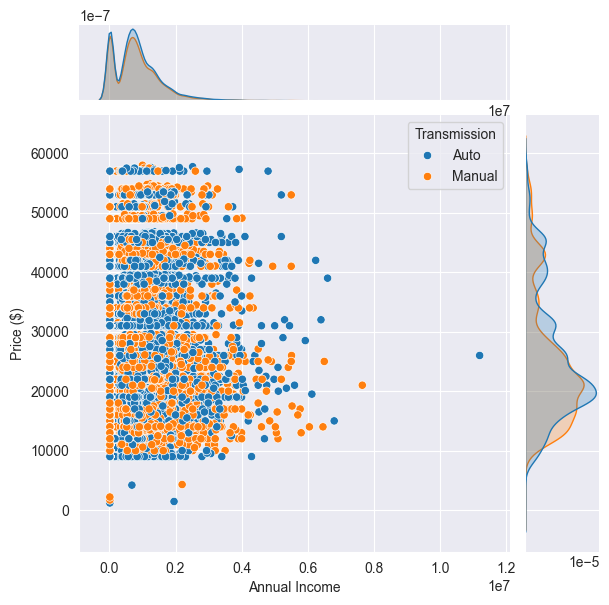

In [107]:
plt.figure(figsize=(5, 5))
sns.jointplot(data=df,x='Annual Income',y='Price ($)',hue='Transmission')

<Axes: xlabel='Price ($)', ylabel='Body Style'>

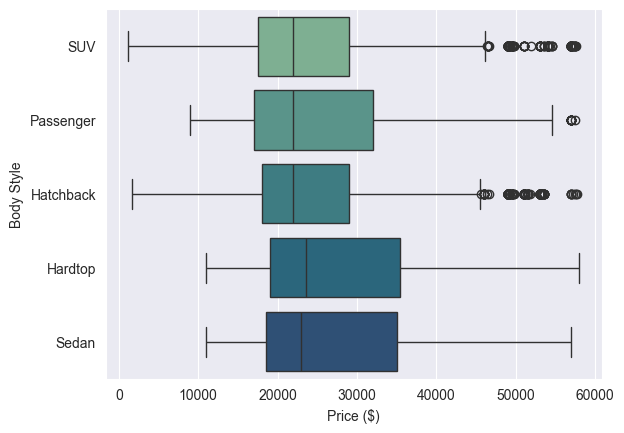

In [108]:
sns.boxplot(data=df, x="Price ($)", y="Body Style",hue='Body Style',palette = 'crest')

<Axes: xlabel='Price ($)', ylabel='Engine'>

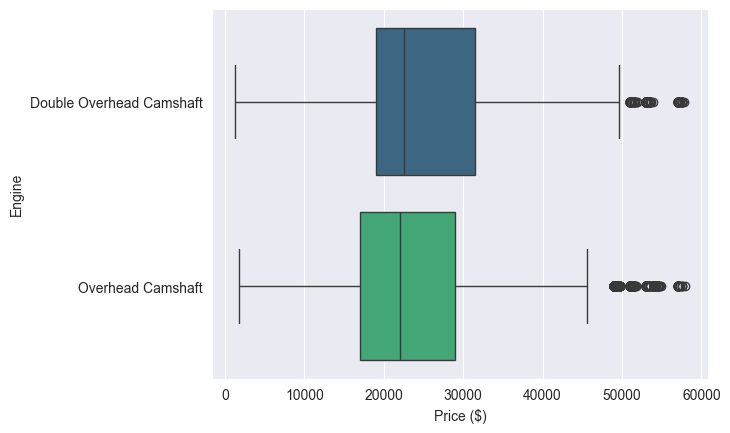

In [109]:
sns.boxplot(data=df, x="Price ($)", y="Engine",hue='Engine',palette = 'viridis')

In [110]:
df['Dealer_Region'].describe()


count      22457
unique         7
top       Austin
freq        3882
Name: Dealer_Region, dtype: object

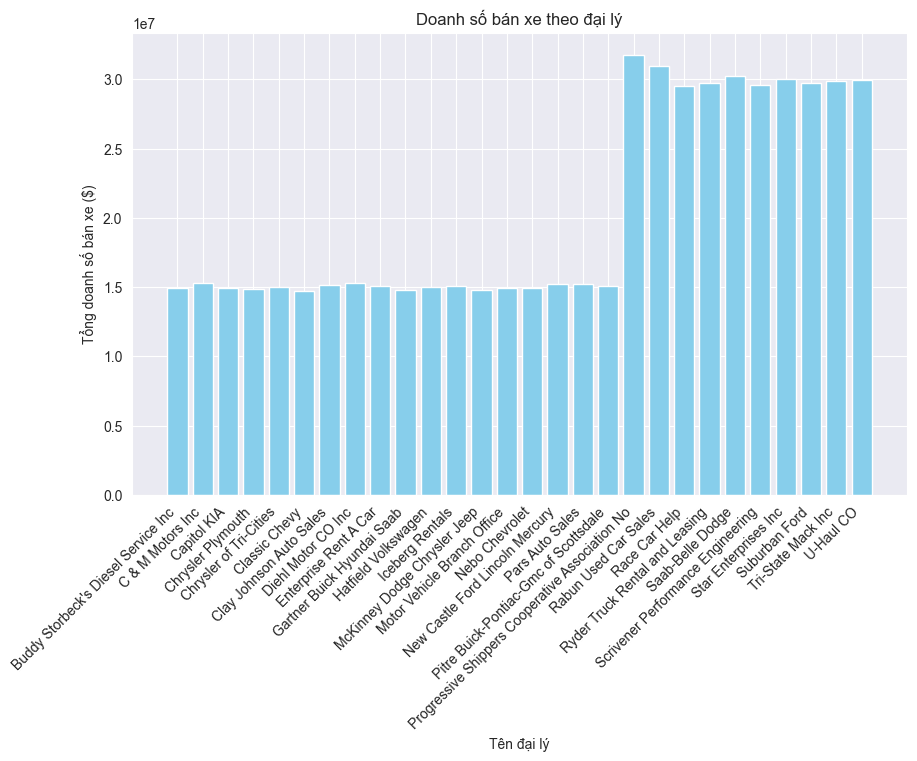

In [111]:
# Tính tổng doanh số bán xe của mỗi đại lý
sales_by_dealer = df.groupby('Dealer_Name')['Price ($)'].sum().reset_index()

# Vẽ biểu đồ cột thể hiện doanh số bán xe của mỗi đại lý
plt.figure(figsize=(10, 6))
plt.bar(sales_by_dealer['Dealer_Name'], sales_by_dealer['Price ($)'], color='skyblue')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Doanh số bán xe theo đại lý')
plt.xlabel('Tên đại lý')
plt.ylabel('Tổng doanh số bán xe ($)')

# Xoay nhãn trục x nếu cần để dễ đọc hơn
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()

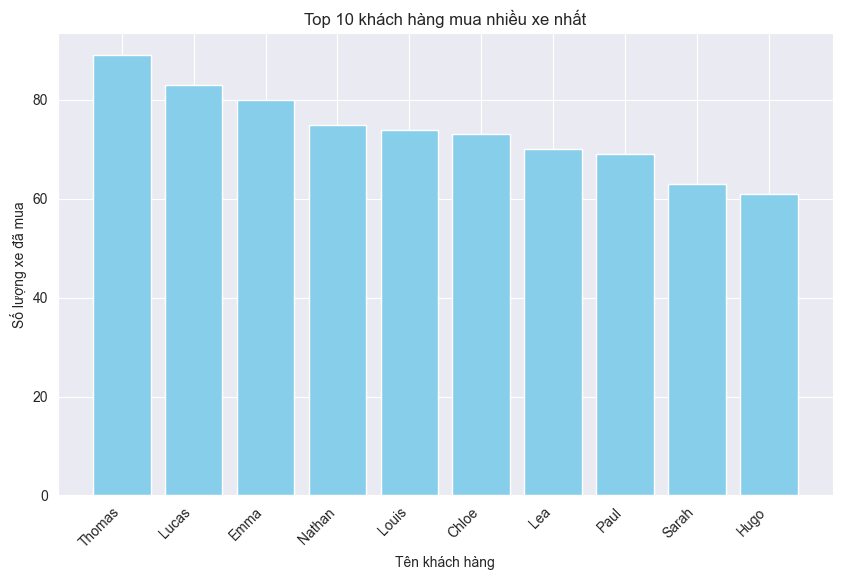

In [112]:
# Đếm số lượng xe mà mỗi khách hàng đã mua
purchases_by_customer = df['Customer Name'].value_counts().reset_index()
purchases_by_customer.columns = ['Customer Name', 'Number of Cars Purchased']

# Chọn top 10 khách hàng mua nhiều xe nhất (có thể tùy chỉnh số lượng)
top_customers = purchases_by_customer.head(10)

# Vẽ biểu đồ cột thể hiện số lượng xe mà các khách hàng đã mua
plt.figure(figsize=(10, 6))
plt.bar(top_customers['Customer Name'], top_customers['Number of Cars Purchased'], color='skyblue')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Top 10 khách hàng mua nhiều xe nhất')
plt.xlabel('Tên khách hàng')
plt.ylabel('Số lượng xe đã mua')

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.show()

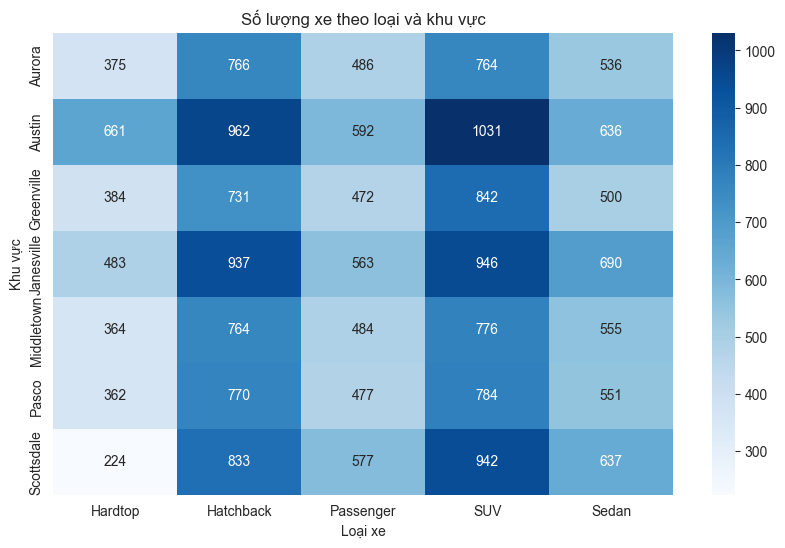

In [113]:
region_body = df.pivot_table(index='Dealer_Region', columns='Body Style', values='Full_Car_Name', aggfunc='count')
plt.figure(figsize=(10, 6))
sns.heatmap(region_body, annot=True, cmap='Blues', fmt='.0f')
plt.title('Số lượng xe theo loại và khu vực')
plt.xlabel('Loại xe')
plt.ylabel('Khu vực')
plt.show()


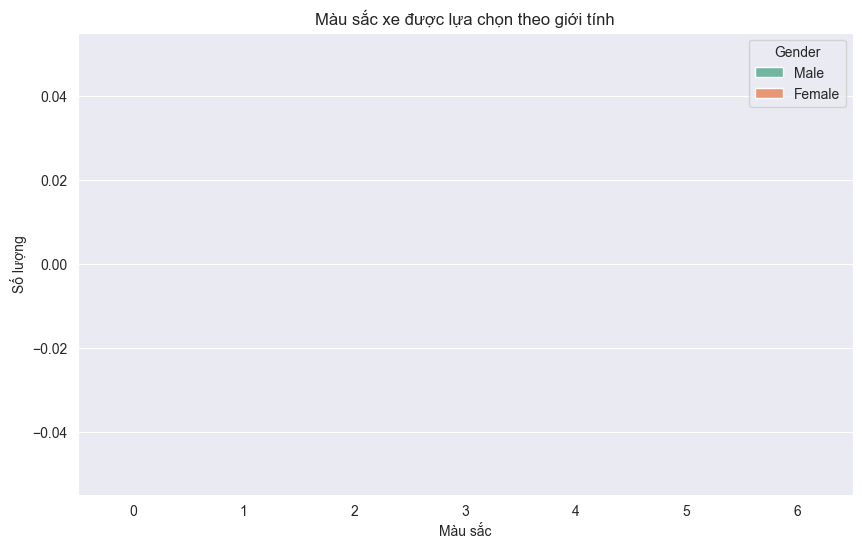

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Color', hue='Gender', data=df, palette='Set2')
plt.title('Màu sắc xe được lựa chọn theo giới tính')
plt.xlabel('Màu sắc')
plt.ylabel('Số lượng')
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

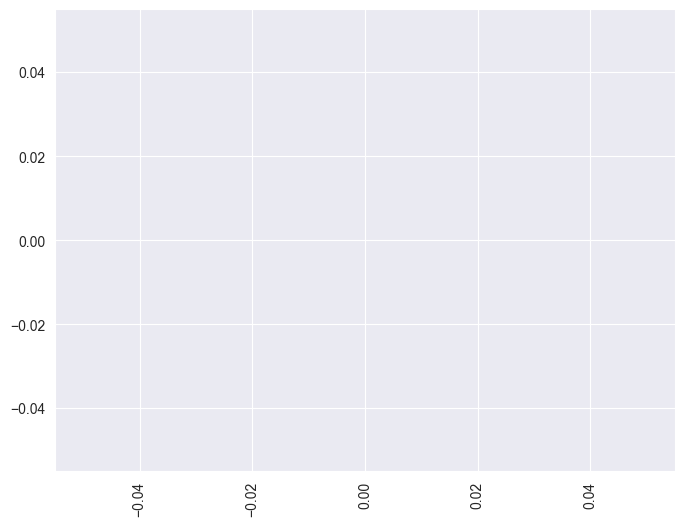

In [115]:
plt.figure(figsize=(8, 6))
df['Color'].value_counts().plot(kind='bar', color='green')
plt.title('Số lượng xe theo từng màu sắc')
plt.xlabel('Màu sắc')
plt.ylabel('Số lượng')
plt.show()


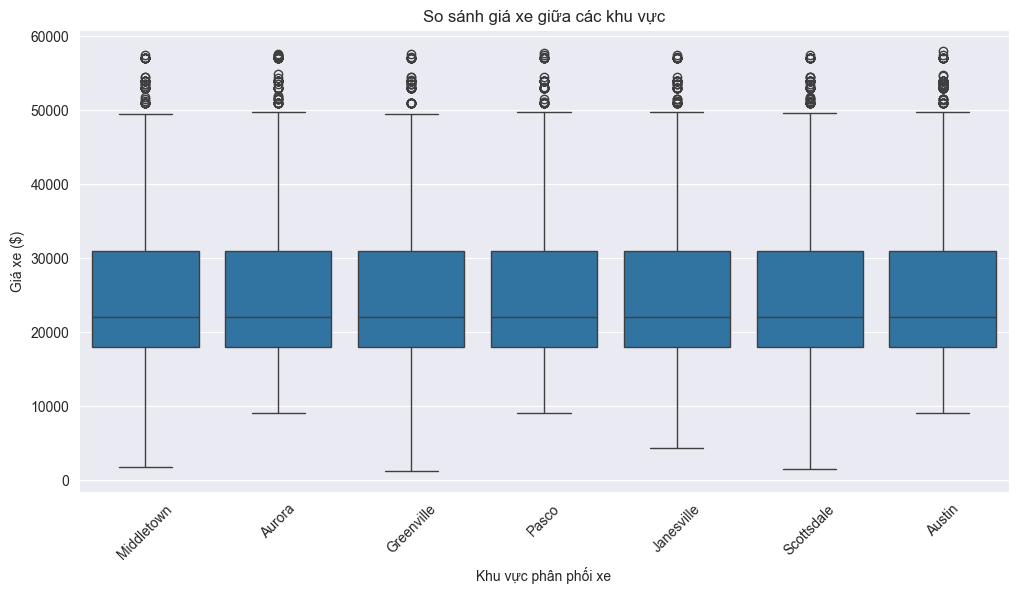

In [116]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('So sánh giá xe giữa các khu vực')
plt.xlabel('Khu vực phân phối xe')
plt.ylabel('Giá xe ($)')
plt.xticks(rotation=45)
plt.show()


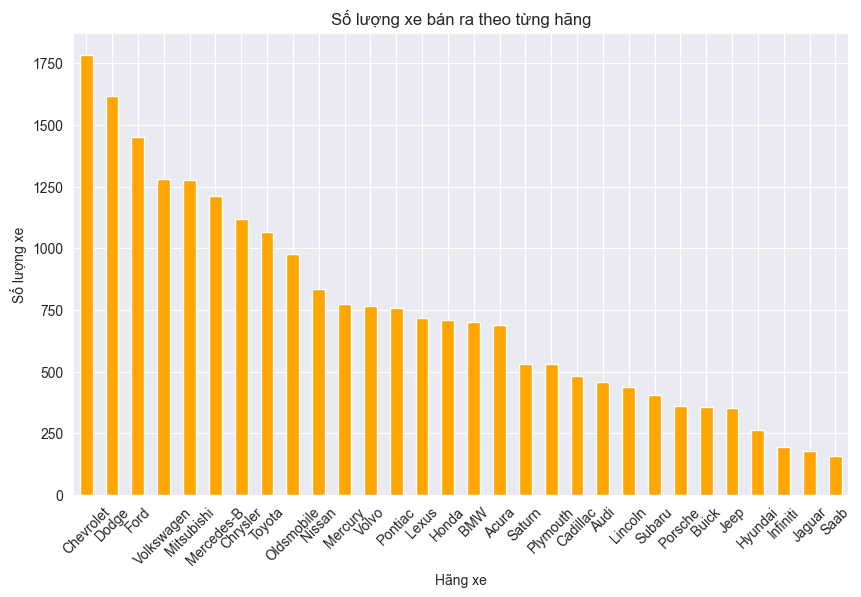

In [117]:
plt.figure(figsize=(10, 6))
df['Company'].value_counts().plot(kind='bar', color='orange')
plt.title('Số lượng xe bán ra theo từng hãng')
plt.xlabel('Hãng xe')
plt.ylabel('Số lượng xe')
plt.xticks(rotation=45)
plt.show()


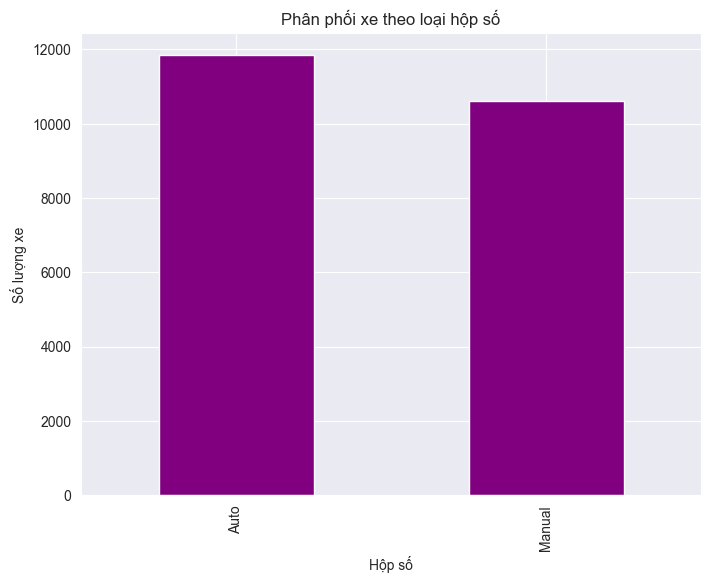

In [118]:
plt.figure(figsize=(8, 6))
df['Transmission'].value_counts().plot(kind='bar', color='purple')
plt.title('Phân phối xe theo loại hộp số')
plt.xlabel('Hộp số')
plt.ylabel('Số lượng xe')
plt.show()


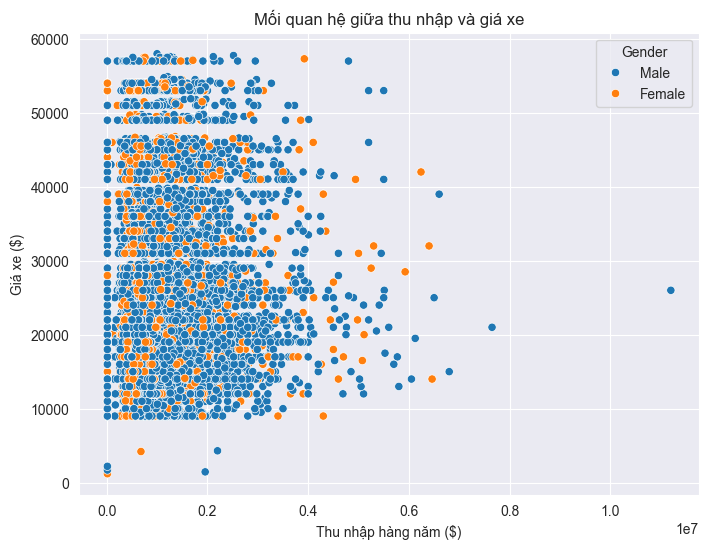

In [119]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income', y='Price ($)', data=df, hue='Gender')
plt.title('Mối quan hệ giữa thu nhập và giá xe')
plt.xlabel('Thu nhập hàng năm ($)')
plt.ylabel('Giá xe ($)')
plt.show()


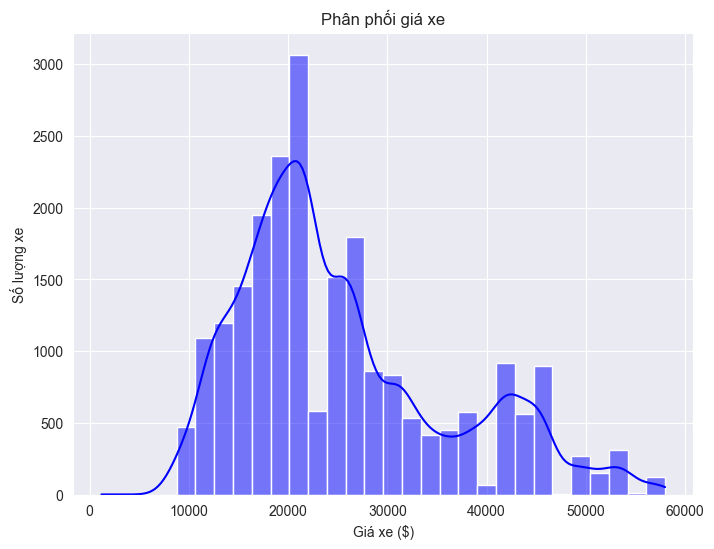

In [120]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price ($)'], kde=True, bins=30, color='blue')
plt.title('Phân phối giá xe')
plt.xlabel('Giá xe ($)')
plt.ylabel('Số lượng xe')
plt.show()


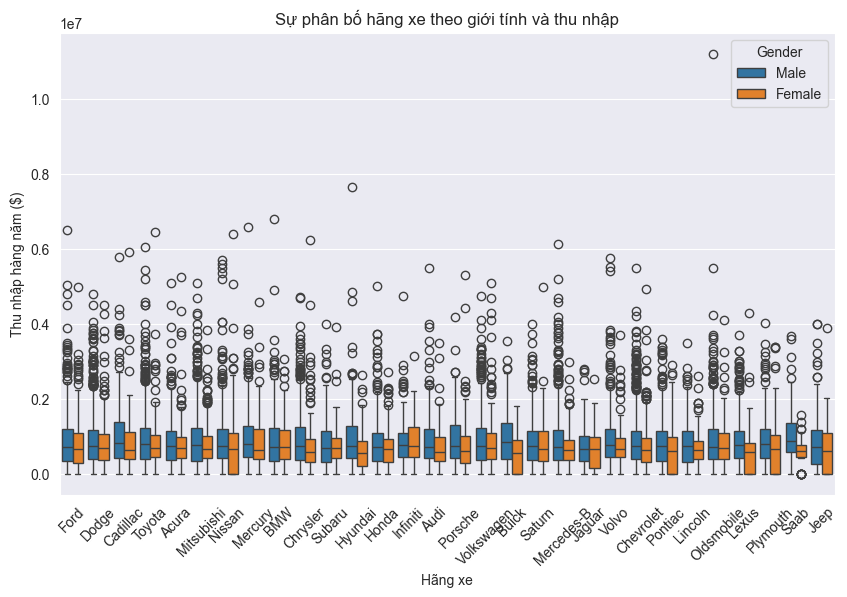

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Annual Income', hue='Gender', data=df)
plt.title('Sự phân bố hãng xe theo giới tính và thu nhập')
plt.xlabel('Hãng xe')
plt.ylabel('Thu nhập hàng năm ($)')
plt.xticks(rotation=45)
plt.show()


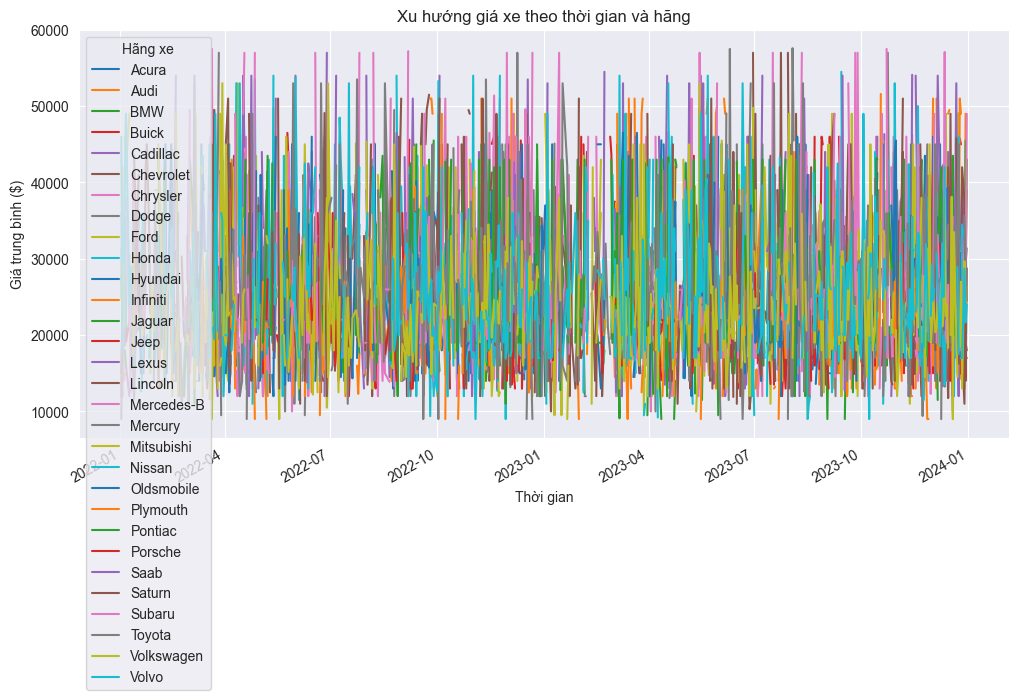

In [122]:
# Chuyển đổi cột Date về datetime
df['Date'] = pd.to_datetime(df['Date'])
# Tính giá trung bình theo thời gian và hãng
trend = df.groupby(['Date', 'Company'])['Price ($)'].mean().unstack()
# Vẽ biểu đồ
trend.plot(figsize=(12, 6))
plt.title('Xu hướng giá xe theo thời gian và hãng')
plt.xlabel('Thời gian')
plt.ylabel('Giá trung bình ($)')
plt.legend(title='Hãng xe')
plt.show()


# Car Sales Prediction

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.decomposition import PCA

In [ ]:
# Crear una lista de modelos
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('SVR', SVR())
]

# Resto del código...


# Codificar las columnas categóricas con Label Encoding
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Body Style', 'Dealer_Region']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Extraer características relevantes y el objetivo
X = df[['Gender', 'Model', 'Engine', 'Transmission', 'Company', 'Color', 'Body Style', 'Dealer_Region']]

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=3)  # Ajusta el número de componentes según tu elección
X_pca = pca.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba

y = df['Price ($)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)



In [ ]:
import joblib 
# Huấn luyện và đánh giá mỗi mô hình, sau đó lưu mô hình
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Model: {model_name}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R^2): {r2}')
    print('-' * 40)

    # Lưu mô hình
    model_filename = f"{model_name.replace(' ', '_').replace('Regressor', '')}.joblib"
    joblib.dump(model, model_filename)
    print(f'Model saved as {model_filename}')

# Deployment of the Model using Streamlit



In [ ]:
!pip install streamlit
